In [1]:
import numpy as np
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
from hiive.mdptoolbox.example import forest
from numpy.random import choice
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
P, R = forest(S=300, r1=100, r2=60, p=0.1)
env_name = 'Forest 300'

In [3]:
def test_policy(P, R, policy, test_count=100, gamma=0.9, max_iter=1000):
    num_state = P.shape[-1]
    episodes = num_state * test_count
    rewards = 0
    for s in range(num_state):
        s_reward = 0
        for epi in range(test_count):
            e_reward = 0
            r = 1
            while max_iter > 0:
                action = policy[s]
                p = P[action][s]
                candidates = list(range(len(p)))
                next_s = choice(candidates, 1, p=p)[0]
                
                e_reward += R[s][action] * r
                r *= gamma 
                max_iter += 1
                if next_s == 0:
                    break
            s_reward += e_reward
        rewards += s_reward
    return rewards / episodes
                

# Value Iteration

In [17]:
eps_list = list(np.linspace(1,10,10)/10)
gamma=0.9
# for eps in eps_list:
columns = ['env name', 'alg name', 'epsilon', 'Reward', 'Iteration', 'Time']
df_vi = pd.DataFrame(columns=columns)
for eps in eps_list:
    vi = ValueIteration(P, R, gamma=gamma, epsilon=eps)
    vi.run()
    # vi.policy
    reward = test_policy(P, R, vi.policy, 100)

    df_temp = pd.DataFrame([[env_name, 'value iteration', eps, reward, vi.iter, vi.time]], columns=columns)
    df_vi = pd.concat([df_vi, df_temp])
df_vi

,env name,alg name,epsilon,Reward,Iteration,Time
0,Forest 300,value iteration,0.1,2.691440,44,0.011976
0,Forest 300,value iteration,0.2,2.613900,40,0.003954
0,Forest 300,value iteration,0.3,2.690215,38,0.002969
0,Forest 300,value iteration,0.4,2.646336,37,0.003374
0,Forest 300,value iteration,0.5,2.581541,36,0.004128
0,Forest 300,value iteration,0.6,2.811185,35,0.003532
0,Forest 300,value iteration,0.7,2.660511,34,0.003481
0,Forest 300,value iteration,0.8,2.773099,34,0.002648
0,Forest 300,value iteration,0.9,2.750880,33,0.003906
0,Forest 300,value iteration,1.0,2.726168,33,0.002619


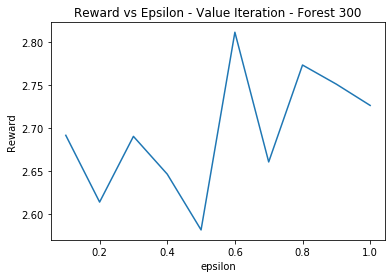

In [18]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='epsilon', y='Reward', data=df_vi)
plt.title('Reward vs Epsilon - Value Iteration - {}'.format(env_name))
plt.show()

In [6]:
gamma_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'gamma', 'Reward', 'Iteration', 'Time']
df_vi = pd.DataFrame(columns=columns)
for gamma in gamma_list:
    vi = ValueIteration(P, R, gamma=gamma)
    vi.run()
    # vi.policy
    reward = test_policy(P, R, vi.policy, 100, eps)

    df_temp = pd.DataFrame([[env_name, 'value iteration', gamma, reward, vi.iter, vi.time]], columns=columns)
    df_vi = pd.concat([df_vi, df_temp])
df_vi

,env name,alg name,gamma,Reward,Iteration,Time
0,Forest 300,value iteration,0.1,4.593333,3,0.000354
0,Forest 300,value iteration,0.2,3.966667,5,0.000708
0,Forest 300,value iteration,0.3,4.110000,7,0.000566
0,Forest 300,value iteration,0.4,4.416667,9,0.000884
0,Forest 300,value iteration,0.5,4.296667,12,0.000995
0,Forest 300,value iteration,0.6,3.280000,16,0.001267
0,Forest 300,value iteration,0.7,4.110000,22,0.002554
0,Forest 300,value iteration,0.8,4.373333,33,0.003181
0,Forest 300,value iteration,0.9,4.226667,55,0.004323
0,Forest 300,value iteration,1.0,3.780000,89,0.006710


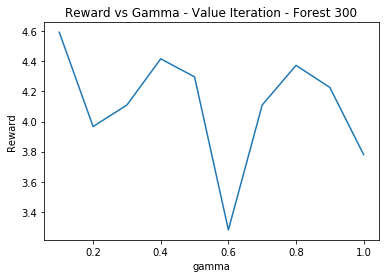

In [7]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='Reward', data=df_vi)
plt.title('Reward vs Gamma - Value Iteration - {}'.format(env_name))
plt.show()

In [8]:
# gamma=0.9
# max_iter_list = [10, 100, 1000]
# columns = ['env name', 'alg name', 'max iter', 'Reward', 'Iteration', 'Time']
# df_vi = pd.DataFrame(columns=columns)
# for max_iter in max_iter_list:
#     vi = ValueIteration(P, R, gamma=gamma, max_iter=max_iter)
#     vi.run()
#     # vi.policy
#     reward = test_policy(P, R, vi.policy, 100, eps)

#     df_temp = pd.DataFrame([[env_name, 'value iteration', max_iter, reward, vi.iter, vi.time]], columns=columns)
#     df_vi = pd.concat([df_vi, df_temp])
# df_vi

# Policy Iteration

In [9]:
gamma_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'gamma', 'Reward', 'Iteration', 'Time']
df_pi = pd.DataFrame(columns=columns)
for gamma in gamma_list:
    pi = PolicyIteration(P, R, gamma=gamma)
    pi.run()
    # vi.policy
    reward = test_policy(P, R, pi.policy)

    df_temp = pd.DataFrame([[env_name, 'policy iteration', gamma, reward, pi.iter, pi.time]], columns=columns)
    df_pi = pd.concat([df_pi, df_temp])
df_pi

,env name,alg name,gamma,Reward,Iteration,Time
0,Forest 300,policy iteration,0.1,2.679218,2,0.009138
0,Forest 300,policy iteration,0.2,2.805946,3,0.004303
0,Forest 300,policy iteration,0.3,2.684727,4,0.005323
0,Forest 300,policy iteration,0.4,2.759193,5,0.006254
0,Forest 300,policy iteration,0.5,2.666199,7,0.009515
0,Forest 300,policy iteration,0.6,2.747260,9,0.011821
0,Forest 300,policy iteration,0.7,2.697701,12,0.015740
0,Forest 300,policy iteration,0.8,2.465977,16,0.019838
0,Forest 300,policy iteration,0.9,2.624493,25,0.033148


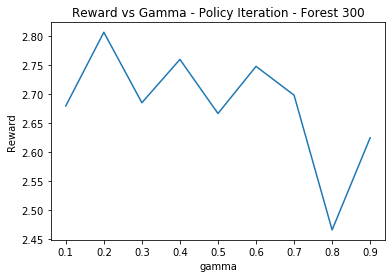

In [10]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='Reward', data=df_pi)
plt.title('Reward vs Gamma - Policy Iteration - {}'.format(env_name))
plt.show()

In [11]:
max_iter_list = [10, 100, 500, 1000, 10000]
columns = ['env name', 'alg name', 'max iter', 'Reward', 'Iteration', 'Time']
df_pi = pd.DataFrame(columns=columns)
for max_iter in max_iter_list:
    pi = PolicyIteration(P, R, gamma=0.9, max_iter=max_iter)
    pi.run()
    # vi.policy
    reward = test_policy(P, R, pi.policy)
    df_temp = pd.DataFrame([[env_name, 'policy iteration', max_iter, reward, pi.iter, pi.time]], columns=columns)
    df_pi = pd.concat([df_pi, df_temp])
df_pi

,env name,alg name,max iter,Reward,Iteration,Time
0,Forest 300,policy iteration,10,2.723344,10,0.018420
0,Forest 300,policy iteration,100,2.706208,25,0.030307
0,Forest 300,policy iteration,500,2.696577,25,0.031259
0,Forest 300,policy iteration,1000,2.771266,25,0.029946
0,Forest 300,policy iteration,10000,2.643254,25,0.030884


# Q-learning

In [12]:
gamma_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'gamma', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for gamma in gamma_list:
    Q = QLearning(P, R, gamma=gamma)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', gamma, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,gamma,Reward,Time
0,Forest 300,Q-Learning,0.1,1.819947,0.523199
0,Forest 300,Q-Learning,0.2,1.864678,0.876129
0,Forest 300,Q-Learning,0.3,1.938791,0.532609
0,Forest 300,Q-Learning,0.4,1.776551,0.538362
0,Forest 300,Q-Learning,0.5,1.762522,0.526224
0,Forest 300,Q-Learning,0.6,1.952710,0.614664
0,Forest 300,Q-Learning,0.7,1.829737,0.523496
0,Forest 300,Q-Learning,0.8,1.825802,0.544635
0,Forest 300,Q-Learning,0.9,1.812971,0.551213


In [13]:
epsilon_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'epsilon', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for epsilon in epsilon_list:
    Q = QLearning(P, R, 0.9, epsilon=epsilon)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', epsilon, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,epsilon,Reward,Time
0,Forest 300,Q-Learning,0.1,1.915267,0.568595
0,Forest 300,Q-Learning,0.2,2.062923,0.565338
0,Forest 300,Q-Learning,0.3,1.876604,0.617818
0,Forest 300,Q-Learning,0.4,1.760120,0.555211
0,Forest 300,Q-Learning,0.5,1.771529,0.548029
0,Forest 300,Q-Learning,0.6,1.752205,0.539668
0,Forest 300,Q-Learning,0.7,1.915962,0.541944
0,Forest 300,Q-Learning,0.8,1.869873,0.559518
0,Forest 300,Q-Learning,0.9,1.825802,0.563300


In [14]:
epsilon_decay_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'epsilon decay', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for eps_d in epsilon_decay_list:
    Q = QLearning(P, R, 0.9, epsilon_decay=eps_d)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', eps_d, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,epsilon decay,Reward,Time
0,Forest 300,Q-Learning,0.1,1.806447,0.551298
0,Forest 300,Q-Learning,0.2,1.977522,0.523466
0,Forest 300,Q-Learning,0.3,1.875695,0.572346
0,Forest 300,Q-Learning,0.4,1.955174,0.547107
0,Forest 300,Q-Learning,0.5,1.880185,0.548338
0,Forest 300,Q-Learning,0.6,1.856091,0.570600
0,Forest 300,Q-Learning,0.7,2.114957,0.549578
0,Forest 300,Q-Learning,0.8,1.810341,0.545808
0,Forest 300,Q-Learning,0.9,1.793420,0.556112


In [15]:
alpha_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'alpha', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for alpha in alpha_list:
    Q = QLearning(P, R, 0.9, alpha=alpha)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', alpha, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,alpha,Reward,Time
0,Forest 300,Q-Learning,0.1,1.944630,0.578267
0,Forest 300,Q-Learning,0.2,1.801813,0.681890
0,Forest 300,Q-Learning,0.3,1.859168,0.576498
0,Forest 300,Q-Learning,0.4,1.771597,0.540818
0,Forest 300,Q-Learning,0.5,1.901489,0.612930
0,Forest 300,Q-Learning,0.6,1.917152,0.540199
0,Forest 300,Q-Learning,0.7,1.914610,0.581015
0,Forest 300,Q-Learning,0.8,1.956813,0.602635
0,Forest 300,Q-Learning,0.9,1.835004,0.553749


In [16]:
max_iter_list = [10000, 20000, 30000, 40000, 50000, 100000, 200000]
columns = ['env name', 'alg name', 'max_iter', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for max_iter in max_iter_list:
    Q = QLearning(P, R, 0.9, n_iter=max_iter)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', max_iter, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,max_iter,Reward,Time
0,Forest 300,Q-Learning,10000,1.984047,0.624775
0,Forest 300,Q-Learning,20000,1.812376,0.991490
0,Forest 300,Q-Learning,30000,1.924767,1.515251
0,Forest 300,Q-Learning,40000,0.413333,1.940714
0,Forest 300,Q-Learning,50000,1.945927,2.327713
0,Forest 300,Q-Learning,100000,2.153213,4.571046
0,Forest 300,Q-Learning,200000,0.700000,8.777127
